# Block pseudoinversion
Here we analyse the formula of block pseudoinversion we have got. 

## Introduction
Because in Data Analysis and ML [6,7] we often have linear independent sets of data (historical data or neural net's weights) we can consider only that case. So, let the $A$ be a matrix of *full column rank*. That means it satisfies the condition $A^+A=E$, where $A^+$ - the pseudoinversed (Moore-Penrose inversion) matrix [1].

The pseudoinversed matrix can be found with one of the following methods: 
1. using SVD decomposition: $A = USV^* \implies A^+ = VS^+U^* $. This method is used in _pinv_ method in the standard math libraries [2,3]. The computational complexity is $O(mn^2)$;
2. using the Grevile's algorithm [4]. In our full-rank case, the computational complexity is about $O(mn^2)$;
3. using the _Hermitian_ formula: $A^+=(A^*A)^{-1}A^*$. The computational complexity is $O(mn^2)$. This formula can be used only for full-column rank matrices. P.S. The name _Hermitian_ is not common, but we refer to this formula a lot and we introduced that name.
4. Clines formula for block matrices [5].


## Our method
In this research, we get the new formula for finding pseudoinversed matrix:

$$A^+ = [A_1; A_2; \dots; A_n]^+=\begin{bmatrix}
        \begin{bmatrix}
            A_1^+ \\
            A_2^+ \\
            \dots \\
            A_n^+ \\
        \end{bmatrix}
        [A_1; A_2; \dots; A_n]
    \end{bmatrix}^{-1}      \begin{bmatrix}
            A_1^+ \\
            A_2^+ \\
            \dots \\
            A_n^+ \\
        \end{bmatrix} = \begin{bmatrix}
            E & A_1^+A_2 & \dots & A_1^+A_n \\
            A_2^+A_1 & E &  \dots & A_2^+A_n \\
            \dots & \dots &  \dots & \dots \\
            A_n^+A_1 & A_n^+A_1 &  \dots &  E \\
        \end{bmatrix}^{-1}
         \begin{bmatrix}
            A_1^+ \\
            A_2^+ \\
            \dots \\
            A_n^+ \\
        \end{bmatrix}
        .$$

${\textcolor{red}{!revealed \ yesterday}}$ After some processing: we can get: 

$$
    A^+ \approx          \begin{bmatrix}
            A_1^+ \\
            A_2^+ \\
            \dots \\
            A_n^+ \\
        \end{bmatrix}
$$

This is a Moore-Penrose pseudounversed matrix (we have the proof). But it has some valuable *advantages*. 
- First of all, it's the generalization of Grevile's algorithm, and the generalization of the _Hermitian_ formula as well (we also have the proofs).
- It requires inversing smaller blocks, which is more effective from the calculation time perspective
- We can see that the formula is very parallelizable. We split the big matrix into a few small submatrices and multiply them in parallel. The computational advantage increases with increasing the width of the matrix (amount of columns).
- It has a big computational advantage when the pseudoinversed for blocks are known. For example, we have already trained model. And new data comes. Or we decided to add the hidden layer to the neural network [7]. Then the recalculation of new weight requires much less resources than training it again.

$\LARGE{\textcolor{red}{!}}$ _Because the pseudoinversion resolves the least squared problem it could have a lot of applications._ 

*Notes*
- The Column splitting $[A_1;A_2;\cdots;A_n]^{+}$ is arbitrary and can be optimized.
- Pseudoinverse: 
- **First Step**     (1) -> (2) Arbitrary splitting
- **Second Step**    (2) -> (3) Calculation of $A_i^+$
- **Third Step**     (3) -> (4) Calculating Elementwise
- **Fourth Step**    (4) -> (5) Calculate the inverse
- **Sixth Step**     (5) -> (6) *Inverse*



## Case of 2 blocks

In [8] we got the formula of pseudoinversed matrix of full-column rank for the case of 2 blocks:

$$
A^+ = [A_1 \enspace A_2]^+= 
        \begin{bmatrix}
            A^{\tau} \\
            B^+(E-AA^{\tau})
        \end{bmatrix},
$$

where $A^{\tau} = (E - A^+BB^+A)^+A^+(E - BB^+)$.

Now let's imagine the following situation. We have the system $Ax = D$, and new data $B$ comes and system takes the form:
$$ 
[A \enspace B] \begin{bmatrix} x \\ y \end{bmatrix} = D.
$$

Using our formula we can immediately find the parameter $y$: 
$$
y = B^+(E-AA^{\tau}).
$$
And it requires much fewer calculations than the calculation of $[A \enspace B]^+$, because we operate with the smaller matrices and we already know the $A^+$.


# Modelling of the cyclic processes with the Kaczmarz algorithm

Let's have some cyclic process, where each knot of the cycle is described by some sets of the parameters $X = (x_1, x_2, \dots, x_n)$.
And now we can imagine that this cycle is the limit cycle of the Kaczmarz algorithm. It means that we can restore the system of linear equations corresponding to that process: $AX=B$. 

$\LARGE{\textcolor{red}{!}}$ _The relations between the gotten system and the real process is the point of research._



# References
1. [Regression and the Moore-Penrose pseudoinverse, Albert, A., Elsevier (1972)](https://cds.cern.ch/record/1253778/export/hx)

2. [Matlab pinv documentation](https://de.mathworks.com/help/matlab/ref/pinv.html#mw_ffa95973-29a2-48a1-adb0-5a4214e0d9cf)

3. [Numpy pinv documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)

4. T.N.E. Grevile Some applications of the pseudo-inverse of matrix SIAM Rev. (1960)

5. R.E. Cline, Representation for the generalized inverse of a partitioned matrix, J.Soc. Industr. Appl. Math., 12 (1964), 588–600.

6. [J. Tapson and A. van Schaik, Learning the Pseudoinverse Solution to Network Weights](https://arxiv.org/pdf/1207.3368.pdf)

7. [Matthias Kissel; Klaus Diepold, Convolutional Neural Networks with analytically determined Filters](https://ieeexplore.ieee.org/abstract/document/9891906/figures#figures)

8. [A note on heuristic analog of Cline’s formula Shmyrin, A., Mishachev, N., Trofimov, E. Global Journal of Pure and Applied Mathematics, 2016, 12(4), стр. 3401–3405](https://www.ripublication.com/gjpam16/gjpamv12n4_51.pdf)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import gc
%run binv.ipynb import binv, hpinv,fast_binv,super_fast_binv

##  Сomparison our formula _binv_ with _numpy.linalg.pinv_

OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
To avoid this warning, please rebuild your copy of OpenBLAS with a larger NUM_THREADS setting
or set the environment variable OPENBLAS_NUM_THREADS to 128 or lower


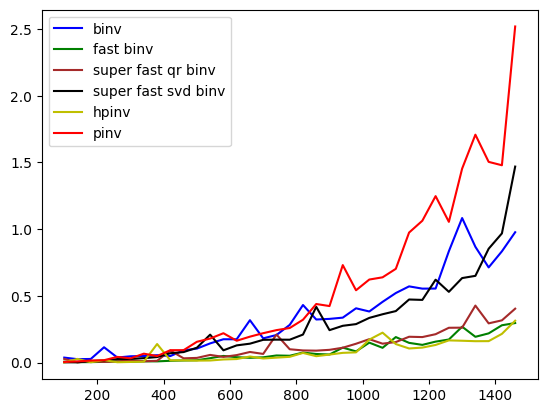

In [5]:
from numpy.linalg import inv, pinv, norm

rows_amount = []
train_time_in_parallel = []
train_time_fast_binv = []
train_time_superfast_fast_svd_binv = []
train_time_superfast_fast_qr_binv = []
train_time_fast_hpinv = []
train_time_in_one_thread = []

rows = 100
while rows < 1_500:
    rows_amount.append(rows)
    columns = rows
    check_matrix = np.random.rand(columns, rows)

    gc.collect()

    start = time.time()
    pinv(check_matrix)
    finish = time.time()
    train_time_in_one_thread.append(finish - start)

    gc.collect()

    start = time.time()
    binv(check_matrix, columns // 10)
    finish = time.time()
    train_time_in_parallel.append(finish - start)

    gc.collect()

    start = time.time()
    fast_binv(check_matrix)
    finish = time.time()
    train_time_fast_binv.append(finish - start)

    gc.collect()

    start = time.time()
    hpinv(check_matrix)
    finish = time.time()
    train_time_fast_hpinv.append(finish - start)

    gc.collect()

    start = time.time()
    super_fast_binv(check_matrix, method="qr")
    finish = time.time()
    train_time_superfast_fast_qr_binv.append(finish - start)

    gc.collect()

    start = time.time()
    super_fast_binv(check_matrix)
    finish = time.time()
    train_time_superfast_fast_svd_binv.append(finish - start)

    rows += 40

plt.plot(rows_amount, train_time_in_parallel, "-b", label="binv")
plt.plot(rows_amount, train_time_fast_binv, "-g", label="fast binv")
plt.plot(
    rows_amount, train_time_superfast_fast_qr_binv, "brown", label="super fast qr binv"
)
plt.plot(
    rows_amount,
    train_time_superfast_fast_svd_binv,
    "black",
    label="super fast svd binv",
)
plt.plot(rows_amount, train_time_fast_hpinv, "-y", label="hpinv")
plt.plot(rows_amount, train_time_in_one_thread, "-r", label="pinv")
plt.legend(loc="upper left")
plt.show()

We can see that the computational advantage of _binv_ is increasing with the matrix size. But this result is gotten with simplest using _python.ThreadPool_ parallelization which requires a lof of context changing. Programming with CUDA or MPI will boost the calculation dramatically. 


### Draft for future  

Also, the matrix in the main formula could be rewritten using the following formulas:
1. $(A+B)^+ = (A^+B + B^+A + 2E)^{-1}(A^+ + B^+)$ (it requires to inverse only small blocks, which is more preferable) 


${\textcolor{red}{!}}$ After preprocessing revealed yesterday, it could be simplified to $(A+B)^+ \approx \frac{1}{2}(A^+ + B^+)$


2. ...